<a href="https://colab.research.google.com/github/mohammedterry/ANNs/blob/master/ANN_NeuroEvo_ELM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
!curl -O https://pmcvariety.files.wordpress.com/2018/04/twitter-logo.jpg?w=100&h=100&crop=1
!ls

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3593  100  3593    0     0  29211      0 --:--:-- --:--:-- --:--:-- 29211
 sample_data  'twitter-logo.jpg?w=100'


In [0]:
from PIL import Image
image = Image.open('twitter-logo.jpg?w=100')

In [0]:
import numpy as np
image_array = np.asarray(image)

In [0]:
training_inputs,training_outputs = [],[]
for row,rgbs in enumerate(image_array):
  for column,rgb in enumerate(rgbs):
    training_inputs.append(np.array([row,column]))
    r,g,b = rgb
    training_outputs.append(np.array([r/255,g/255,b/255]))

# NeuroEvolution

In [0]:
import numpy as np
import random

class FFNN:
  def __init__(self, weights):
    self.weights = weights
  
  def _f(self,x): #activation function: sigmoid
    return 1. / (1. + np.exp(-x))
  
  def __call__(self, x): #forward pass through each layer in the deep ffnn
    for w in self.weights:
      x = self._f(x @ w)
    return x

class GA:
  evolutionary_history = [0]
  #hyperparameters
  n_hidden = 15
  max_generations = 1000
  population_size = 40
  p_perturb_weight = .8
  p_mutate_weight = .08
  p_mutate_layer = .03

  def __init__(self,n_inputs,n_outputs,x_test,y_test):
    self.n_inputs, self.n_outputs = n_inputs,n_outputs 
    self.genomes = [[np.random.rand(self.n_inputs,self.n_hidden),np.random.rand(self.n_hidden,self.n_outputs)] for _ in range(self.population_size)]  #each genome is a 2D matrix of synapse weights for each layer in ffnn
    self.x_test = x_test
    self.y_test = y_test
    
  def fitness(self, weights):
    ann = FFNN(weights)
    y_predicted = np.array([ann(x) for x in self.x_test])
    difference = np.sum((self.y_test - y_predicted)**2) 
    return 1/difference
  
  def rank(self,genomes):
    fitnesses = [self.fitness(genome) for genome in genomes]
    self.evolutionary_history.append( max(fitnesses) )
    return [genomes[i] for _,i in sorted(zip(fitnesses,[i for i in range(len(fitnesses))]), reverse=True)] #rank genomes by fitness

  def mutate(self,genomes):
    def noise(x):
      return x + np.random.uniform(-.1,.1) if np.random.random() <= self.p_perturb_weight else np.random.uniform(-1,1) if np.random.random() <= self.p_mutate_weight else x
    noise = np.vectorize(noise) 

    for i,weights in enumerate(genomes):   
      genomes[i] = [noise(layer) for layer in weights] #change some weights
      if np.random.random() <= self.p_mutate_layer: #add another hidden layer 
        pointer = np.random.randint(1,len(weights)) #add it inbetween the input and output layers
        genomes[i] = weights[:pointer] + [np.random.rand(self.n_hidden,self.n_hidden)] + weights[pointer:]                  
    return genomes
  
  def crossover(self,genome1,genome2): #one-point crossover
    pointer1 = np.random.randint(1,len(genome1))
    pointer2 = np.random.randint(1,len(genome2))
    new_genome1 = genome1[:pointer1] + genome2[pointer2:]
    new_genome2 = genome2[:pointer2] + genome1[pointer1:]
    return new_genome1, new_genome2
  
  def mate(self,genome1,genome2):
    child1,child2 = self.crossover(genome1,genome2)
    return genome1, genome2, child1, child2 # returns x2 parents & x2 children (i.e. mixtures of both parents)
  
  def g_algorithm(self):
    elites = self.rank(self.genomes)[:(self.population_size // 4) -1] #keep top quarter for mating 
    self.best_genome = elites[0]
    offspring = [child for parent1,parent2 in zip(elites,random.sample(elites, len(elites))) for child in self.mate(parent1,parent2) ]  #elite's offspring replace population (4 children for every genome)
    self.genomes = self.mutate(offspring) + [self.best_genome] + [[np.random.rand(self.n_inputs,self.n_hidden), np.random.rand(self.n_hidden,self.n_outputs)] for _ in range(3)]
    
  def evolve(self):
    for generation in range(self.max_generations):
      self.g_algorithm()
      print(generation, self.evolutionary_history[-1])
      

In [0]:
g = GA(2,3,training_inputs,training_outputs)
g.evolve()
best_weight = g.best_genome

0 0.0015014548981972446
1 0.0015349094775174686
2 0.0015871914712773311
3 0.0017423485744680323
4 0.0019188569550736448
5 0.002285701541214244
6 0.0023256904278934334
7 0.002350954569866542
8 0.002350954569866542
9 0.002372584269141275
10 0.002372584269141275
11 0.0024651293143130343
12 0.0024651293143130343
13 0.0024651293143130343
14 0.002475626861986037
15 0.002475626861986037
16 0.0025017013025113856
17 0.0025311297445490344
18 0.002546294662961028
19 0.0026130965834026986
20 0.0026130965834026986
21 0.0026130965834026986
22 0.0026130965834026986
23 0.0026130965834026986
24 0.0026130965834026986
25 0.0026130965834026986
26 0.0026130965834026986
27 0.002617242745862149
28 0.002617242745862149
29 0.002617242745862149
30 0.002617242745862149
31 0.002617242745862149
32 0.0026497895573244844
33 0.0026497895573244844
34 0.0026497895573244844
35 0.0026497895573244844


Text(0, 0.5, 'fitness')

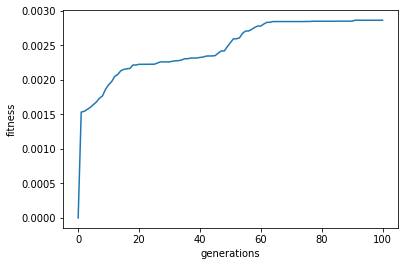

In [44]:
import matplotlib.pyplot as plt
plt.plot(g.evolutionary_history)
plt.xlabel('generations')
plt.ylabel('fitness')

In [45]:
best_weight

[array([[ 0.62785222,  0.71562108,  0.36081591,  0.43226141,  0.40869612,
          0.3119378 ,  0.29222111,  0.90964541,  0.03719217,  0.97395606,
         -0.36664533,  1.41142008, -0.00191884,  1.29017682,  0.70186627],
        [ 0.13197066, -0.07815594, -0.41051013, -0.27012937,  0.22042487,
          0.95902668,  0.70002455, -0.0753386 ,  1.03353151,  0.61394259,
          0.10187795,  0.53571343,  0.03707282,  1.14442844,  0.64212475]]),
 array([[ 0.69999143,  0.09797277, -0.00335103],
        [-0.55702924, -0.29822477,  0.0800354 ],
        [ 1.53621406,  1.03486762,  0.87284974],
        [-0.42165745,  0.00362047, -0.3783124 ],
        [ 1.39762815,  0.36501137,  0.55949742],
        [ 0.41819539,  0.53560007,  0.63568494],
        [ 0.25514164,  0.15442585,  0.63277598],
        [-0.6615813 , -0.22144733,  0.15713805],
        [ 0.24871772,  1.03658564, -0.96146224],
        [ 0.05207554,  0.27673485,  0.40901447],
        [ 0.46860998,  0.58283575,  0.31137148],
        [-0.5

In [46]:
evolved_ann = FFNN(best_weight)
evolved_ann([1,1])

array([0.79097908, 0.91450756, 0.94650401])

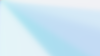

In [47]:
predicted_outputs = evolved_ann(training_inputs)

predicted_image_array = np.zeros_like(image_array)
i = 0
for row,rgbs in enumerate(predicted_image_array):
  for column in range(len(rgbs)):
    r,g,b = predicted_outputs[i]
    predicted_image_array[row][column] = [r*255,g*255,b*255]
    i += 1
Image.fromarray(predicted_image_array)

# Extreme Learning Machine

In [0]:
import numpy as np

class ELM:
  def __init__(self, n_inputs: int, n_hidden = 3000):
    self.random_weights = np.random.normal(size=[n_inputs, n_hidden])
    
  def learn(self, X: np.ndarray, Y: np.ndarray):
    H = self._hidden_layer(X)
    self.output_weights = np.linalg.pinv(H) @ Y
    
  def _f(self, x: np.ndarray): 
    return 1. / (1. + np.exp(-x)) #activation function: sigmoid
    
  def _hidden_layer(self, inputs: np.ndarray): 
    return self._f(inputs @ self.random_weights)
  
  def _output_layer(self, hidden: np.ndarray): 
    return hidden @ self.output_weights
  
  def __call__(self, inputs: np.ndarray):  #infer
    return self._output_layer(self._hidden_layer(inputs))

In [0]:
elm = ELM(2)
elm.learn(np.array(training_inputs), np.array(training_outputs))

In [0]:
elm([1,1])

array([0.95012379, 0.94977713, 0.94932604])

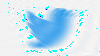

In [0]:
predicted_outputs = elm(training_inputs)

predicted_image_array = np.zeros_like(image_array)
i = 0
for row,rgbs in enumerate(predicted_image_array):
  for column in range(len(rgbs)):
    r,g,b = predicted_outputs[i]
    predicted_image_array[row][column] = [r*255,g*255,b*255]
    i += 1
Image.fromarray(predicted_image_array)